#CHECK

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pathlib
import matplotlib.pyplot as plt
# import heapq, random
import pandas as pd

!pip install -q rasterio
import rasterio

     |████████████████████████████████| 19.3 MB 75 kB/s 


In [ ]:
def get_tile_nr(x):
  return x.split("_",1)[-1].split(".tif")[0] 

def remove_duplicates_x(files_x):
  for item in files_x:
    tile_nr = get_tile_nr(item)
    if ("(" in item):
      # print(item)
      files_x.remove(item)
  return files_x

In [ ]:
def get_files_y(y_path):
  files_y = [str(f) for f in pathlib.Path(y_path).glob('*.tif')] #binary
  len_y = len(files_y)
  print(len_y)
  files_y = remove_duplicates_x(files_y)
  print(len_y)
  return files_y



In [ ]:

def open_tiff_y(y):
  raster = rasterio.open(y)
  y = raster.read()
  # shape needs to be (256,256,1) (currently 1,256,256) Might depend per region what they have..
  y_moved = np.moveaxis(y, 0, -1) #np array, source  (axis), destination (axis)
  return y_moved

In [ ]:
def find_non_zero(fn):
  """"" 
  Return the file and the corresponding id(s) of ls pixels
  Return the id(s) of ls pixels --> amount gives indication of amount ls pixels
  """""
  raster = rasterio.open(fn)
  f = raster.read()
  idy = np.argwhere(f > 0) 
  # return f,idy #or return the read file...?
  return idy

In [ ]:

def check_if_ls(files_y):
  """"" 
  Sort the files on their amount of ls pixels
  """""
  files_y = get_files_y(files_y)
  y_ls = []
  y_non_ls = []
  for i in range(len(files_y)):
    id_y = find_non_zero(files_y[i])
    amount_ls_pixels = len(id_y)
    if amount_ls_pixels != 0:
      y_ls.append(amount_ls_pixels)
    else: 
      y_non_ls.append(files_y[i]) #or just a number..

  return y_ls,y_non_ls
  

In [ ]:
path_y = "/content/drive/MyDrive/Thesis/Y/"
!ls -la {path_y}

total 16
drwx------ 2 root root 4096 Oct  7 13:18 Hiro
drwx------ 2 root root 4096 Oct  7 13:18 Hok
drwx------ 2 root root 4096 Oct  7 13:18 Hu
drwx------ 2 root root 4096 Oct  7 13:46 Lom


In [ ]:
y_ls_hiro,y_non_ls_hiro = check_if_ls(path_y+"Hiro/")

1096
1096


In [ ]:
y_ls_hok,y_non_ls_hok = check_if_ls(path_y+"Hok/")

336
336


In [ ]:
y_ls_hu,y_non_ls_hu = check_if_ls(path_y+"Hu/")

292
292


In [ ]:
y_ls_lom,y_non_ls_lom = check_if_ls(path_y+"Lom/")

331
331


In [ ]:
print(len(y_ls_hiro))#,len(y_non_ls_hiro))
print(len(y_ls_hok))#,len(y_non_ls_hok))
print(len(y_ls_hu))#,len(y_non_ls_hu))
print(len(y_ls_lom))#,len(y_non_ls_lom))

638
30
105
232


In [ ]:
print(len(y_non_ls_hiro))
print(len(y_non_ls_hok))
print(len(y_non_ls_hu))
print(len(y_non_ls_lom))

450
306
187
99


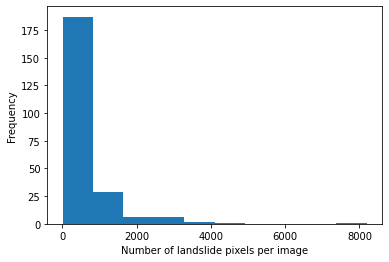

In [ ]:
plt.hist(y_ls_lom)
plt.xlabel('Number of landslide pixels per image')
plt.ylabel('Frequency')
# plt.savefig("ls_hiro")
plt.show()
plt.close()

In [ ]:
y_ls_hiro #make a hist

[213,
 42,
 95,
 241,
 319,
 21,
 153,
 1110,
 1521,
 8,
 83,
 396,
 1462,
 14,
 177,
 2871,
 201,
 289,
 9,
 504,
 115,
 222,
 134,
 16,
 135,
 43,
 92,
 56,
 3965,
 20,
 51,
 249,
 232,
 514,
 898,
 169,
 418,
 20,
 26,
 24,
 803,
 510,
 42,
 125,
 35,
 165,
 186,
 4559,
 11,
 165,
 382,
 1,
 1257,
 200,
 391,
 4148,
 724,
 265,
 2379,
 656,
 24,
 1916,
 32,
 1533,
 8643,
 4249,
 433,
 2583,
 1810,
 3,
 921,
 530,
 3326,
 338,
 5114,
 2018,
 1323,
 108,
 746,
 543,
 393,
 15,
 28,
 191,
 1276,
 57,
 10,
 3,
 45,
 516,
 4,
 360,
 9,
 66,
 10,
 116,
 23,
 6,
 72,
 222,
 100,
 246,
 65,
 79,
 197,
 3,
 166,
 130,
 812,
 540,
 15,
 323,
 179,
 89,
 511,
 74,
 14,
 25,
 144,
 56,
 2,
 59,
 32,
 1174,
 2962,
 66,
 9,
 178,
 455,
 421,
 6,
 15,
 8,
 1,
 72,
 21,
 53,
 28,
 13,
 3394,
 27,
 1804,
 41,
 3621,
 264,
 64,
 25,
 4,
 2,
 34,
 24,
 45,
 42,
 14,
 90,
 275,
 22,
 1060,
 29,
 4,
 82,
 1367,
 135,
 167,
 17,
 89,
 5,
 338,
 603,
 451,
 543,
 59,
 298,
 7,
 24,
 258,
 145,
 71,
 380,


# Check all ls

In [ ]:
tfrec_files_all_ls = tf.io.gfile.glob('gs://kds-107a311b00ae5f20d08f8918fa9855818659144fe84176374977d289/*')

In [ ]:
def parse_record(record):
  tfrecord_format = {
    "Y": tf.io.FixedLenFeature([],tf.string),
    "sar1": tf.io.FixedLenFeature([],tf.string),
    "sar2": tf.io.FixedLenFeature([],tf.string),
    "dem": tf.io.FixedLenFeature([],tf.string)
   
    }
  return tf.io.parse_single_example(record, tfrecord_format) 

dim = 256

#return to image, so decode parse record
def decode_record(record):

  record_parsed = parse_record(record)
  # dataType = float32
  b1 = tf.io.decode_raw(
      record_parsed['sar1'],out_type = float
  )
  b2 = tf.io.decode_raw(
      record_parsed['sar2'],out_type = float
  )
  dem = tf.io.decode_raw(
      record_parsed['dem'],out_type = float
  )
  y = tf.io.decode_raw(
      record_parsed['Y'],out_type = float      
  )

  #first scale to corr -1,1 for dem
  dem = tf.where([dem < -1.000], x=[-1.000], y = [dem])
  
   #images are flattened, so have to put back to og shape
  b1_rs = tf.reshape(b1,(dim,dim))  #w, h 256,256
  b2_rs = tf.reshape(b2,(dim,dim))
  dem_rs = tf.reshape(dem,(dim,dim))
  y1_rs = tf.reshape(y,(dim,dim,1)) #hopefully y1 is then (256,256,1)

  # #might want to stack them before
  image_x = tf.stack((b1_rs,b2_rs,dem_rs),axis = -1) #if axis = -1 then get (nr im,w,h,3)

  return image_x,y1_rs

In [ ]:
AUTO = tf.data.AUTOTUNE
ignore_order = tf.data.Options()
ignore_order.experimental_deterministic = False

n_batch = 64
def get_training_dataset(files,len_shuffle, batch_size=n_batch):
    dataset = tf.data.TFRecordDataset(files, num_parallel_reads=AUTO)
    dataset = dataset.with_options(ignore_order)
    dataset = dataset.cache()
    dataset = dataset.repeat(2) 
    #then do map of decode_record and augment. By augment the oversampled images become less duplicative.
    # dataset = dataset.map(lambda ex: decode_record(ex), num_parallel_calls=AUTO)
    # dataset = dataset.map(scale_to_0_1,num_parallel_calls = AUTO) #or it could be included in decode_record function.
    dataset = dataset.map(decode_record, num_parallel_calls=AUTO)
    # dataset = dataset.map(augment, num_parallel_calls=AUTO)
    # dataset = dataset.shuffle(buffer_size= len_shuffle, seed=seed) #when shuffle?? #shuffle before batching?..  
    # dataset = dataset.batch(batch_size, drop_remainder=False) #bc seconde one is only 16 for bsize 512.
    dataset = dataset.batch(batch_size, drop_remainder=True) #bc seconde one is only 16 for bsize 512.
    dataset = dataset.prefetch(AUTO)
    
    return dataset


In [ ]:
train_dataset = get_training_dataset(tfrec_files_train[0],len_files_to_shuffle)
ds = train_dataset.take(1)

In [ ]:
for x,y in ds:
  tf.where(y != 1)
  
  